## Regresion Polinomial & Feature engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [2]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

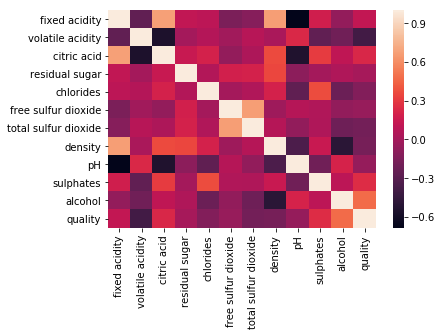

In [4]:
a = data.corr(method = "pearson")
sns.heatmap(a, 
      xticklabels=a.columns.values, 
      yticklabels=a.columns.values)

In [5]:
data = data.rename(columns =  {'free sulfur dioxide':'fsd'})
data = data.rename(columns = {'total sulfur dioxide':'tsd'})
data = data.rename(columns = {'fixed acidity':'fa'})
data = data.rename(columns = {'citric acid':'ca'})
data.head()

,fa,volatile acidity,ca,residual sugar,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data['sd'] = data.fsd * data.tsd
data['acid'] = data.fa * data.ca
data.head()

,fa,volatile acidity,ca,residual sugar,chlorides,fsd,tsd,density,pH,sulphates,alcohol,quality,sd,acid
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,374.0,0.000
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1675.0,0.000
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,810.0,0.312
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1020.0,6.272
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,374.0,0.000


In [7]:
data = data[['sd','acid','quality']] 
data.head()

,sd,acid,quality
0,374.0,0.000,5
1,1675.0,0.000,5
2,810.0,0.312,5
3,1020.0,6.272,6
4,374.0,0.000,5


In [8]:
ones = np.linspace(1, 1, num=1599)
data['unos'] = ones
data.head()

,sd,acid,quality,unos
0,374.0,0.000,5,1.0
1,1675.0,0.000,5,1.0
2,810.0,0.312,5,1.0
3,1020.0,6.272,6,1.0
4,374.0,0.000,5,1.0


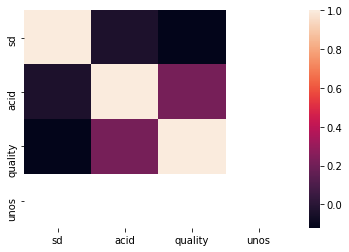

In [9]:
k = data.corr(method = "pearson")
sns.heatmap(k, 
      xticklabels=k.columns.values, 
      yticklabels=k.columns.values)

In [10]:
x = data[['sd','acid']]
x1 = data[['sd']]
x2 = data[['acid']]
y = data[['quality']]
l = len(data)
x1.astype(np.float32)
x2.astype(np.float32)
y = np.array(y)

In [11]:
vectora2 = np.array(data['sd']*data['sd'])
vectorb2 = np.array(data['acid']*data['acid'])
vectorab = np.array(data['sd']*data['acid'])
vector1 = np.array(data['unos'])
vectora = np.array(data['sd'])
vectorb = np.array(data['acid'])
matriz = np.array([vector1, vectora, vectorb, vectora2, vectorb2, vectorab])
matriz = matriz.transpose()

In [12]:
import tensorflow as tf

In [16]:
tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    X = tf.placeholder("float",name="X") 
    Y = tf.placeholder("float",name="Y") 
    
    lr = tf.placeholder("float")
    
    W = tf.Variable(np.zeros((6,1)), name = "W", dtype="float")
        
    with tf.name_scope("hipotesis"):
        y_pred = tf.matmul(X, W,name="hipotesis")

    with tf.name_scope("funcion_costo"):
        cost = tf.reduce_mean(tf.pow(y_pred-Y, 2)) / (2)
        
    with tf.name_scope("Gradient_Descent"):
        cost_summary = tf.summary.scalar("cost",cost)
        
    optimizador = tf.train.GradientDescentOptimizer(lr).minimize(cost)
    init = tf.global_variables_initializer()

In [17]:
def train(epochs = 200,learning_rate = 0.1, step=10):
    tf.reset_default_graph()

    start = time.time()
    with tf.Session(graph=g) as sess: 

        writer = tf.summary.FileWriter('./pruebarp'+str(learning_rate), sess.graph)
        sess.run(init) 
        
        for epoch in range(epochs): 

            _,c = sess.run([optimizador,cost_summary], feed_dict = {X : matriz, Y : y, lr: learning_rate}) 
            writer.add_summary(c, epoch+1)

            if (epoch + 1) % step == 0:
                co,we= sess.run([cost,W],feed_dict = {X : matriz, Y : y, lr: learning_rate}) 
                print("Epoch", (epoch + 1), ": cost =", co, "W =", we) 
                
        writer.close()
    end = time.time()
    
    print("Total time ",end-start)

In [18]:
train(learning_rate = 0.00001)

Epoch 10 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 20 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 30 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 40 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 50 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 60 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 70 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 80 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 90 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 100 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 110 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 120 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 130 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 140 : cost = nan W = [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Epoch 150 : cost = nan W = [[